# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

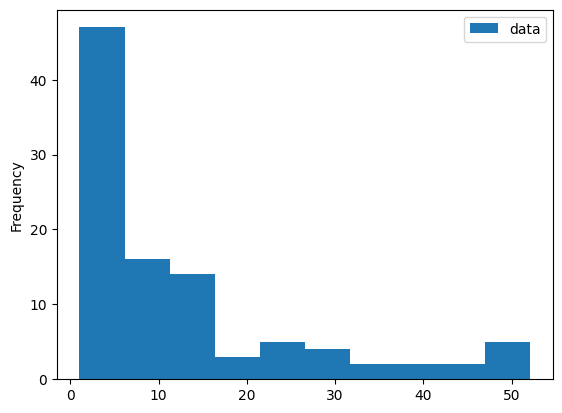

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

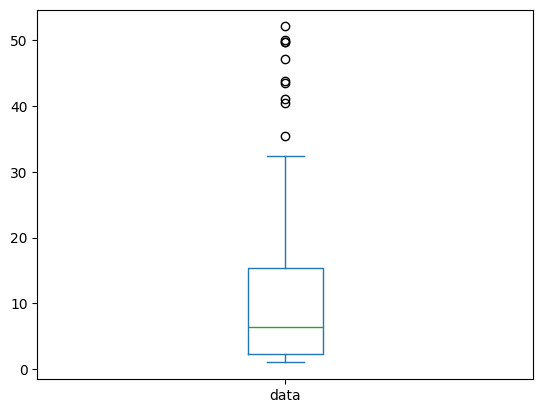

In [4]:
df.plot.box()

## Histograms
### Pros
- Great for visualizing distribution. 
- Clearly shows frequency of data points within specific ranges.
### Cons
- While you can infer general ranges, it's difficult to pinpoint exact percentile values (like the 75th percentile) or clearly identify individual outliers at a glance
- Comparing multiple distributions using histograms side-by-side can be challenging.


## Boxplot
### Pros
- Boxplots concisely display the "five-number summary" of the data: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum (excluding outliers). This will be effective to answer the Pharmacy Administrator's question about which more the expensive drugs tend to cost. 
- Outliers are easily identifiable. 
- Boxplots are great for comparing distributions across different categories or groups side-by-side.
### Cons
- Harder to discern distribution. 
- They don't provide information on the frequency of data points within ranges, unlike histograms.


# What Would I Choose?
I would choose the boxplot.The boxplot directly provides the 75th percentile (Q3), which indicates the threshold above which the most expensive 25% of drugs fall. While the histogram shows the overall skew, the boxplot gives a more precise and actionable understanding of the upper end of the price spectrum.

# Fixing Formatting
- Add a title like "Distribution of Pharmacy Drug Prices" or "Drug Price Quartiles and Outliers."
- Y-axis Label: Clearly label the y-axis as "Drug Price ($)" for immediate understanding.
- Highlight the 75th Percentile adding a horizontal reference line or text annotation directly on the plot indicating the exact value of the 75th percentile (Q3) would be beneficial. 
- For a non-expert audience, you could add small labels or a very brief legend explaining what the box, whiskers, and central line represent (Q1, Median, Q3, etc.).

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [5]:
# Importing Dataset
!pip install kagglehub
import kagglehub
import os

path = kagglehub.dataset_download("tusharbhadouria/credit-card-fraud-detection")
print("Path to dataset files:", path)
credit_fraud_path_to_file = os.path.join(path, "fraudTrain.csv")
credit_fraud_raw_train = pd.read_csv(credit_fraud_path_to_file)

credit_fraud_path_to_file_test = os.path.join(path,"fraudTest.csv")
credit_fraud_raw_test = pd.read_csv(credit_fraud_path_to_file_test)


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/tusharbhadouria/credit-card-fraud-detection/versions/1


In [6]:
# Importing useful libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Credit Fraud Dataset

In [7]:
# Initial Data Exploration Training Data
print("--- Training Data Info ---")
credit_fraud_raw_train.info()
print("\n--- Training Data Head ---")
print(credit_fraud_raw_train.head())
print("\n--- Training Data Description ---")
print(credit_fraud_raw_train.describe())


--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  floa

In [8]:
# Initial Data Exploration Test Data
print("\n--- Test Data Info ---")
credit_fraud_raw_test.info()
print("\n--- Test Data Head ---")
print(credit_fraud_raw_test.head())
print("\n--- Test Data Description ---")
print(credit_fraud_raw_test.describe())



--- Test Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long        

In [9]:
# Check for missing values
print("\n--- Missing Values in Training Data ---")
print(credit_fraud_raw_train.isnull().sum())
print("\n--- Missing Values in Test Data ---")
print(credit_fraud_raw_test.isnull().sum())


--- Missing Values in Training Data ---
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

--- Missing Values in Test Data ---
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city              

In [10]:
# For consistency and focusing on training data
df = credit_fraud_raw_train.copy()

# Convert 'trans_date_trans_time' to datetime objects
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Extract useful time features
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek # Monday=0, Sunday=6
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year

# Calculate age
df['age'] = (pd.to_datetime('now').year - df['dob'].dt.year)


--- Analysis of 'amt' (Transaction Amount) ---


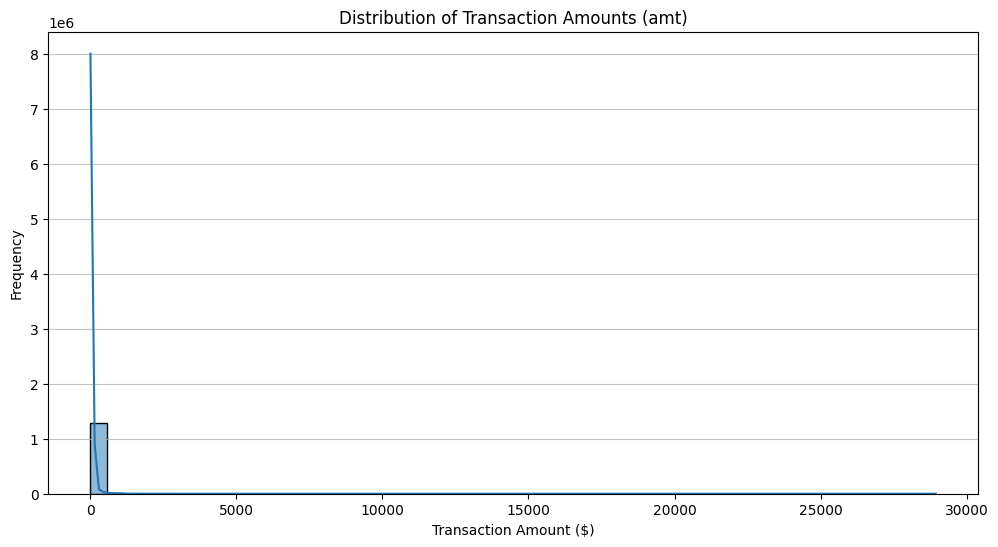

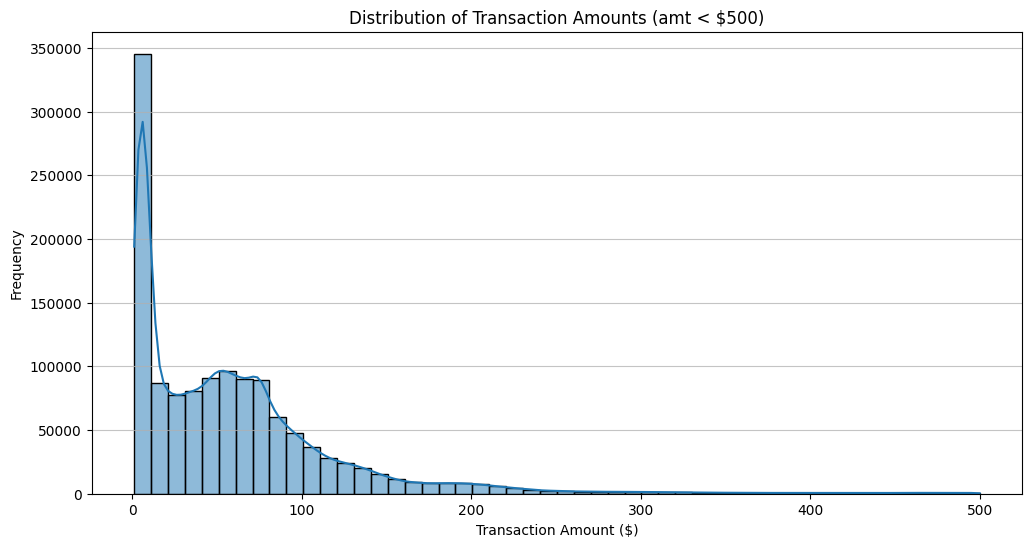

In [11]:
print("\n--- Analysis of 'amt' (Transaction Amount) ---")

# Standard Histogram for 'amt'
plt.figure(figsize=(12, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts (amt)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Observe the extreme skewness, most transactions are very small.
plt.figure(figsize=(12, 6))
sns.histplot(df[df['amt'] < 500]['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts (amt < $500)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


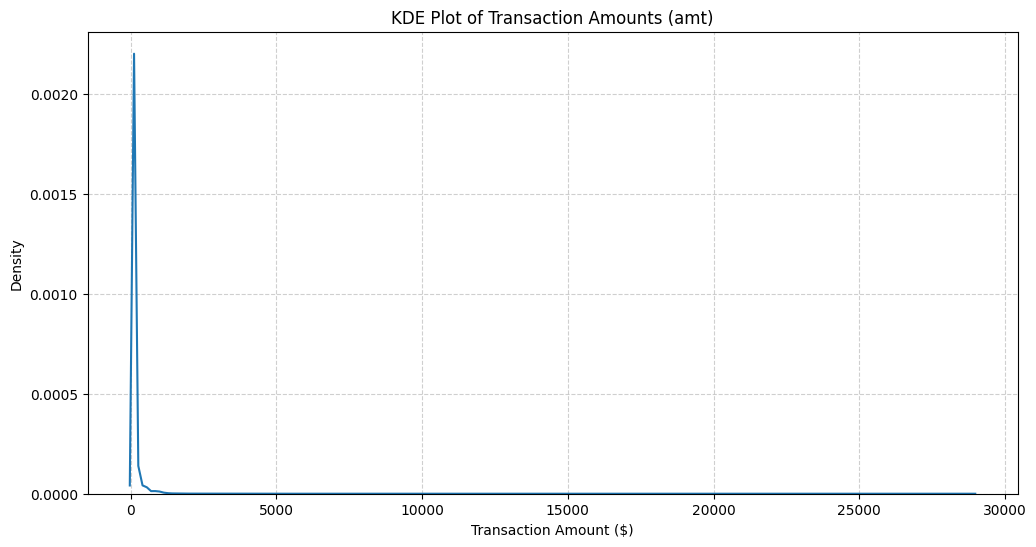

In [12]:
# KDE Plot for 'amt'
plt.figure(figsize=(12, 6))
sns.kdeplot(df['amt'])
plt.title('KDE Plot of Transaction Amounts (amt)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


--- Grouped Analysis of 'amt' by 'is_fraud' ---


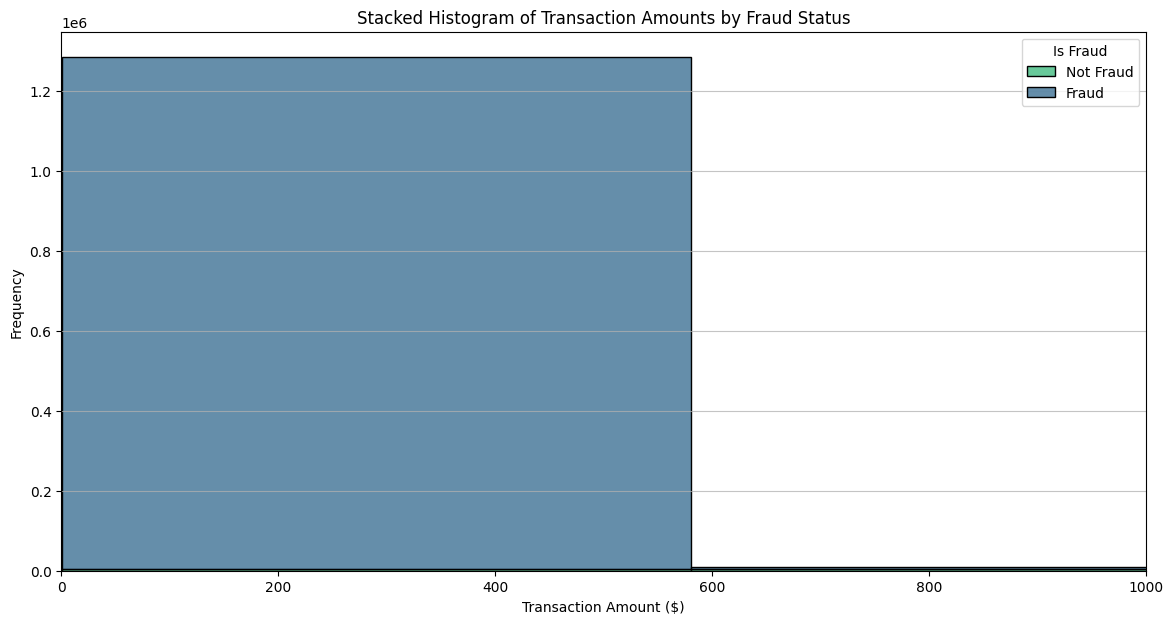

In [13]:
print("\n--- Grouped Analysis of 'amt' by 'is_fraud' ---")

# 'amt' grouped by 'is_fraud'
plt.figure(figsize=(14, 7))
sns.histplot(df, x='amt', hue='is_fraud', bins=50, multiple='stack', palette='viridis')
plt.title('Stacked Histogram of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, 1000) # Limiting x-axis for better visibility of the majority of data
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])
plt.grid(axis='y', alpha=0.75)
plt.show()


--- Bar Plots for Categorical Variables ---


/tmp/ipykernel_4121/3083869307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='pastel')


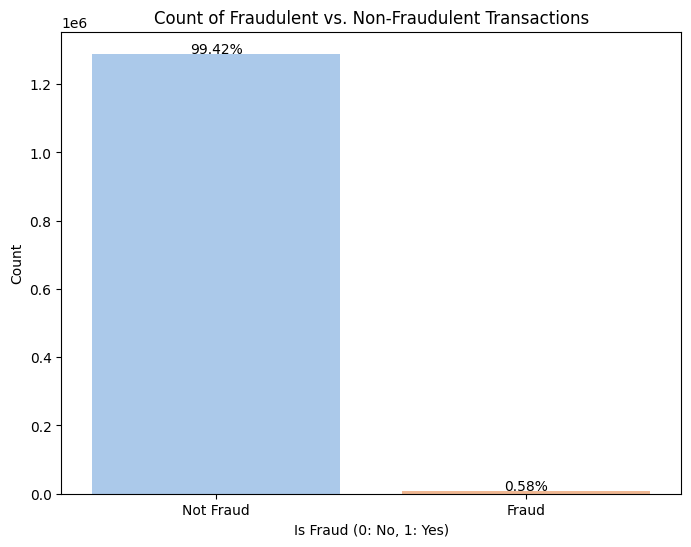

In [14]:
print("\n--- Bar Plots for Categorical Variables ---")

# Bar plot for 'is_fraud' (Class Imbalance)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df, palette='pastel')
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraud (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
# Add percentages
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 1000,
            '{:1.2f}%'.format(100*height/total), ha="center")
plt.show()

/tmp/ipykernel_4121/400646166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='tab10')


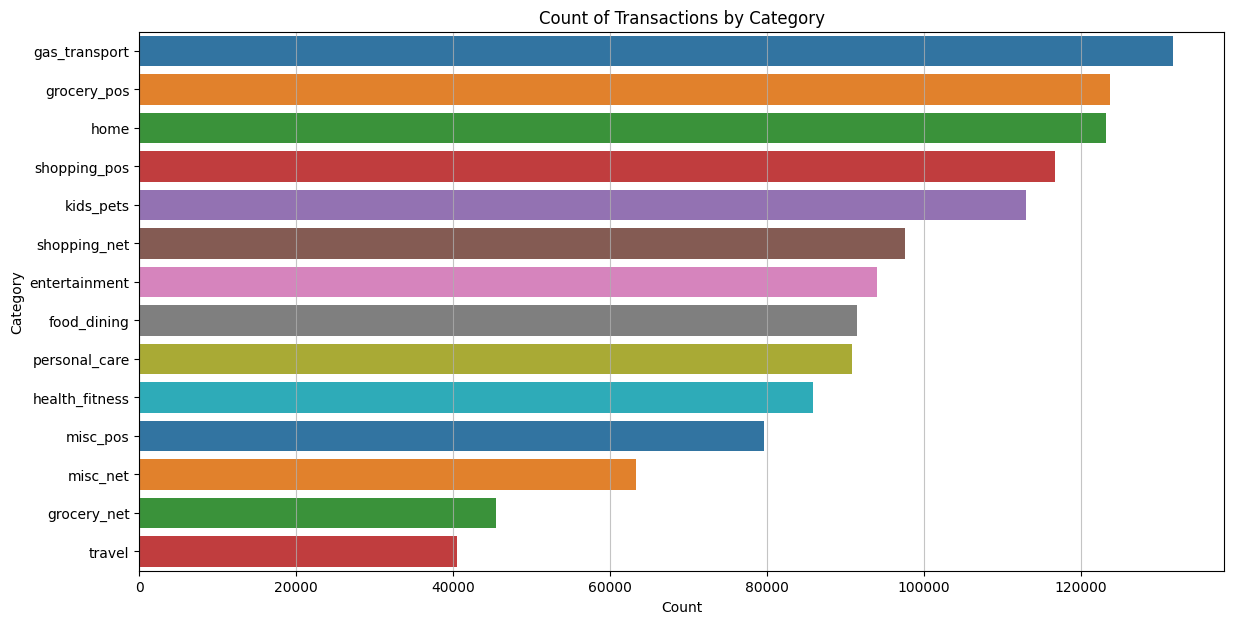

In [15]:
# Bar plot for 'category'
plt.figure(figsize=(14, 7))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='tab10')
plt.title('Count of Transactions by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(axis='x', alpha=0.75)
plt.show()

In [16]:
print("\n--- Descriptive Statistics ---")

# For 'amt' (overall)
print("\n'amt' (Transaction Amount) Statistics:")
print(f"Mean: {df['amt'].mean():.2f}")
print(f"Median: {df['amt'].median():.2f}")
print(f"Mode: {df['amt'].mode()[0]:.2f}") # mode() can return multiple if equally frequent
print(f"Min: {df['amt'].min():.2f}")
print(f"Max: {df['amt'].max():.2f}")
print(f"75th Percentile: {df['amt'].quantile(0.75):.2f}")

# For 'amt' grouped by 'is_fraud'
print("\n'amt' (Transaction Amount) Statistics Grouped by 'is_fraud':")
print(df.groupby('is_fraud')['amt'].agg(['mean', 'median', 'min', 'max', lambda x: x.mode()[0], lambda x: x.quantile(0.75)]).rename(columns={'<lambda_0>': 'mode', '<lambda_1>': '75th_percentile'}))

# For 'category' (mode)
print("\n'category' Mode:")
print(df['category'].mode()[0])

# For 'hour' (mode)
print("\n'hour' Mode:")
print(df['hour'].mode()[0])

# For 'day_of_week' (mode)
print("\n'day_of_week' Mode:")
print(df['day_of_week'].mode()[0])


--- Descriptive Statistics ---

'amt' (Transaction Amount) Statistics:
Mean: 70.35
Median: 47.52
Mode: 1.14
Min: 1.00
Max: 28948.90
75th Percentile: 83.14

'amt' (Transaction Amount) Statistics Grouped by 'is_fraud':
                mean   median   min       max  mode  75th_percentile
is_fraud                                                            
0          67.667110   47.280  1.00  28948.90  1.14           82.540
1         531.320092  396.505  1.06   1376.04  8.75          900.875

'category' Mode:
gas_transport

'hour' Mode:
23

'day_of_week' Mode:
0


# Credit Application Approval Dataset

In [ ]:
df_cca =pd.read_csv("extracted_data_cca/Application_Data.csv")

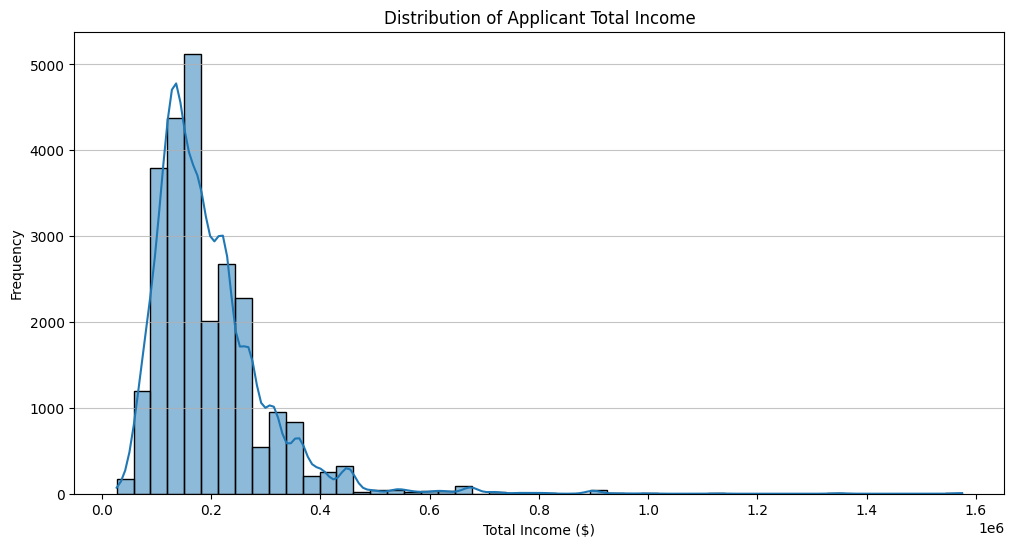

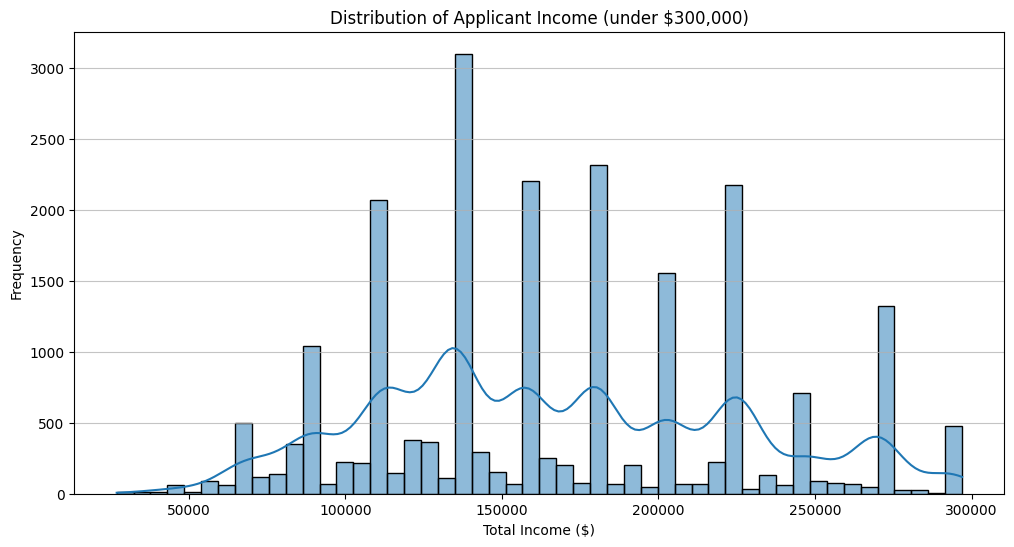

/tmp/ipykernel_4121/3513662050.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cca['Total_Income'].dropna(), shade=True)


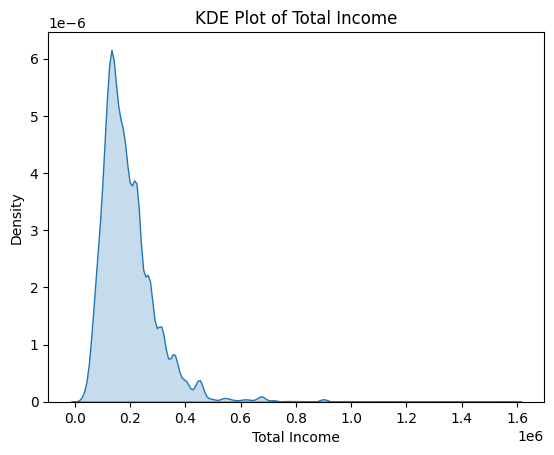

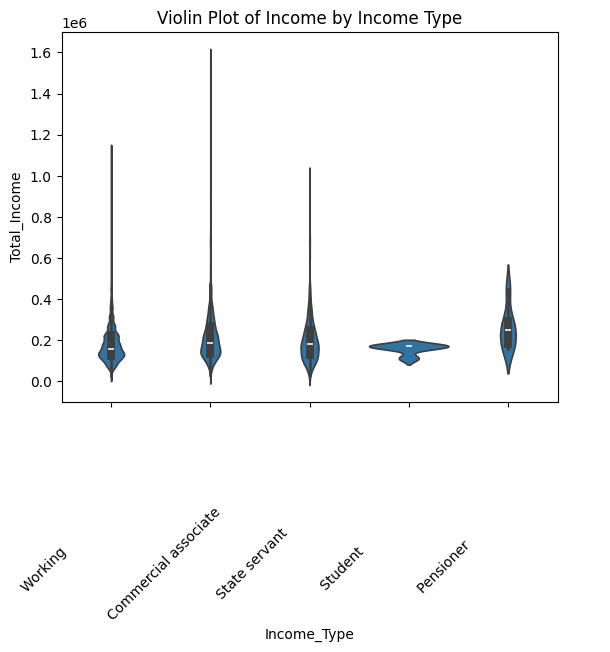

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


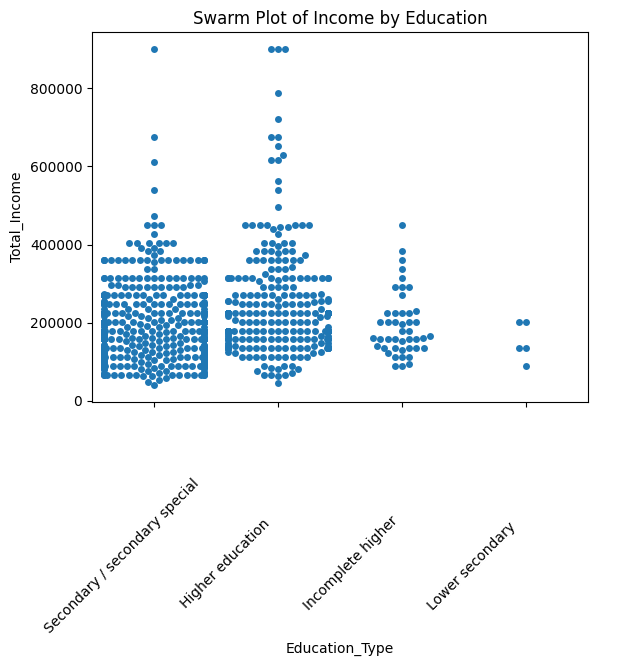

In [41]:
# Different Graphs
#Histogram

plt.figure(figsize=(12, 6))
sns.histplot(df_cca['Total_Income'], bins=50, kde=True)
plt.title('Distribution of Applicant Total Income')
plt.xlabel('Total Income ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Observe the extreme skewness, most incomes are relatively low
plt.figure(figsize=(12, 6))
sns.histplot(df_cca[df_cca['Total_Income'] < 300000]['Total_Income'], bins=50, kde=True)
plt.title('Distribution of Applicant Income (under $300,000)')
plt.xlabel('Total Income ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

#KDE Plot
sns.kdeplot(df_cca['Total_Income'].dropna(), shade=True)
plt.title('KDE Plot of Total Income')
plt.xlabel('Total Income')
plt.show()

#Violin Plot
sns.violinplot(x='Income_Type', y='Total_Income', data=df_cca)
plt.xticks(rotation=45)
plt.title('Violin Plot of Income by Income Type')
plt.show()

#Swarm Plot
sns.swarmplot(x='Education_Type', y='Total_Income', data=df_cca.sample(1000))
plt.xticks(rotation=45)
plt.title('Swarm Plot of Income by Education')
plt.show()

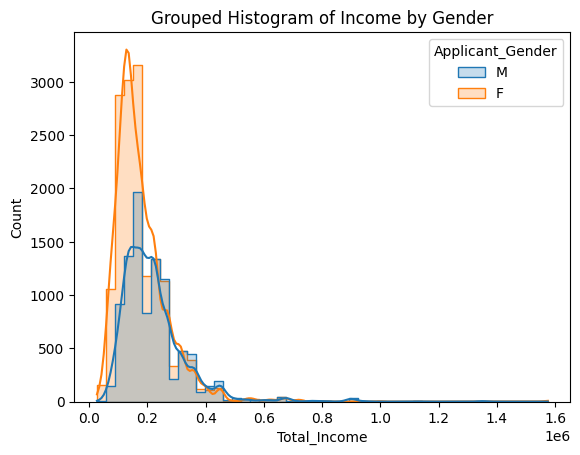

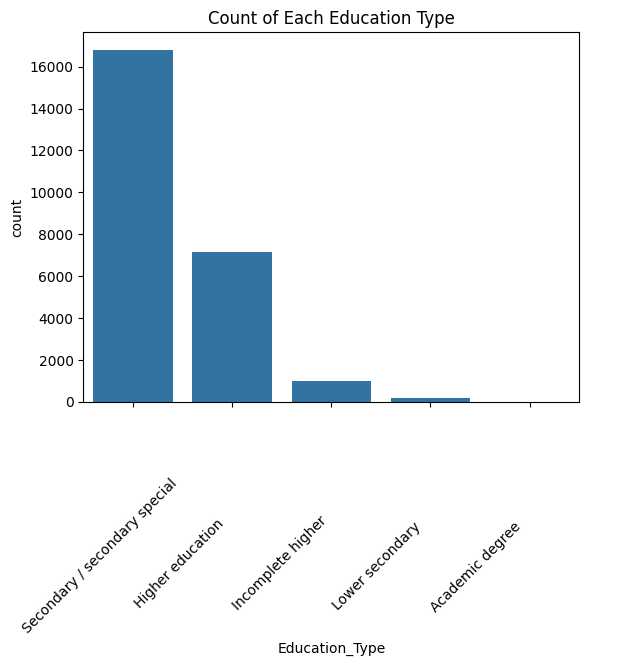

In [39]:
# Grouped Histograms
sns.histplot(data=df_cca, x='Total_Income', hue='Applicant_Gender', bins=50, kde=True, element='step')
plt.title('Grouped Histogram of Income by Gender')
plt.show()

#Bar Graph
sns.countplot(x='Education_Type', data=df_cca)
plt.xticks(rotation=45)
plt.title('Count of Each Education Type')
plt.show()

In [44]:
# Mean, Median, Mode
print("\n--- Descriptive Statistics ---")
print("\n'Total_Income' (Income) Statistics:")
print(f"Mean: {df_cca['Total_Income'].mean():,.2f}")
print(f"Median: {df_cca['Total_Income'].median():,.2f}")
print(f"Mode: {df_cca['Total_Income'].mode()[0]:,.2f}")
print(f"Min: {df_cca['Total_Income'].min():,.2f}")
print(f"Max: {df_cca['Total_Income'].max():,.2f}")
print(f"75th Percentile: {df_cca['Total_Income'].quantile(0.75):,.2f}")

# For 'AMT_INCOME_TOTAL' grouped by 'CODE_GENDER'
print("\nIncome Statistics Grouped by 'Applicant_Gender':")
print(df_cca.groupby('Applicant_Gender')['Total_Income'].agg([
    'mean', 'median', 'min', 'max',
    lambda x: x.mode()[0],
    lambda x: x.quantile(0.75)
]).rename(columns={'<lambda_0>': 'mode', '<lambda_1>': '75th_percentile'}))

# Mode of 'NAME_EDUCATION_TYPE'
print("\nMost Common Education Type:")
print(df_cca['Education_Type'].mode()[0])

# Mode of 'OCCUPATION_TYPE'
print("\nMost Common Occupation:")
print(df_cca['Job_Title'].mode()[0])

# Mode of 'NAME_INCOME_TYPE'
print("\nMost Common Income Type:")
print(df_cca['Income_Type'].mode()[0])


--- Descriptive Statistics ---

'Total_Income' (Income) Statistics:
Mean: 194,836.50
Median: 180,000.00
Mode: 135,000.00
Min: 27,000.00
Max: 1,575,000.00
75th Percentile: 225,000.00

Income Statistics Grouped by 'Applicant_Gender':
                           mean    median    min      max    mode  \
Applicant_Gender                                                    
F                 179176.213349  157500.0  27000  1575000  135000   
M                 220594.132197  202500.0  36900  1350000  225000   

                  75th_percentile  
Applicant_Gender                   
F                        225000.0  
M                        270000.0  

Most Common Education Type:
Secondary / secondary special                     

Most Common Occupation:
Laborers                                          

Most Common Income Type:
Working                                           


# Loan Default Dataset

In [45]:
df_lf =pd.read_csv("extracted_data_ld/Data_Train.csv")

In [48]:
df_lf.describe()

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
count,87500.000000,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,83946.253509,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,36100.102950,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,21560.000000,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,52616.750000,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,83900.000000,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,115261.250000,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,146559.000000,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


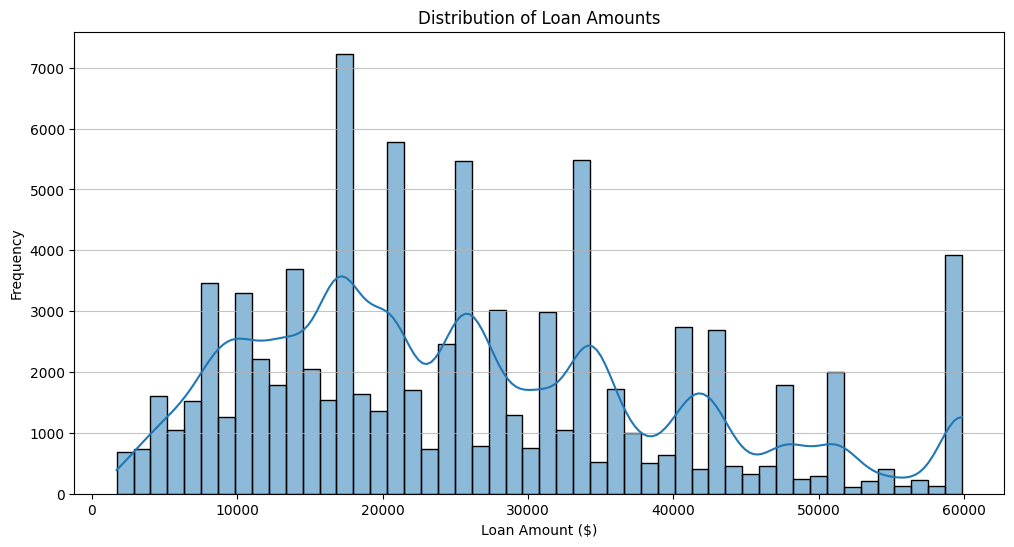

95th percentile of loan amount: $55,404.00


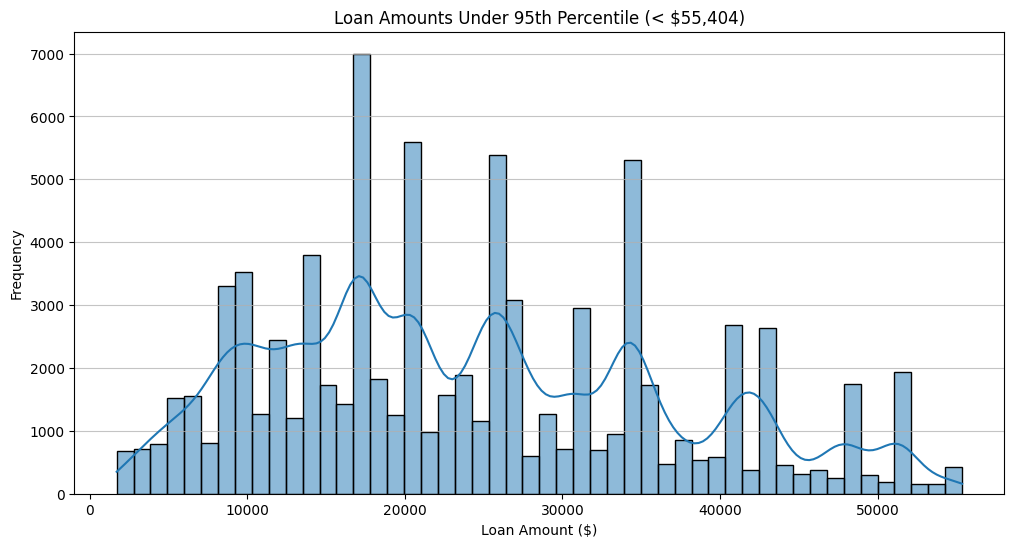

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot(df_lf['Lend_Amount'], bins=50, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Focus on smaller loan amounts for better resolution
cutoff = df_lf['Lend_Amount'].quantile(0.95)
print(f"95th percentile of loan amount: ${cutoff:,.2f}")

plt.figure(figsize=(12, 6))
sns.histplot(df_lf[df_lf['Lend_Amount'] < cutoff]['Lend_Amount'], bins=50, kde=True)
plt.title(f'Loan Amounts Under 95th Percentile (< ${cutoff:,.0f})')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


--- Bar Plots for Categorical Variables ---


/tmp/ipykernel_4121/1390011909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=df_lf, palette='pastel')


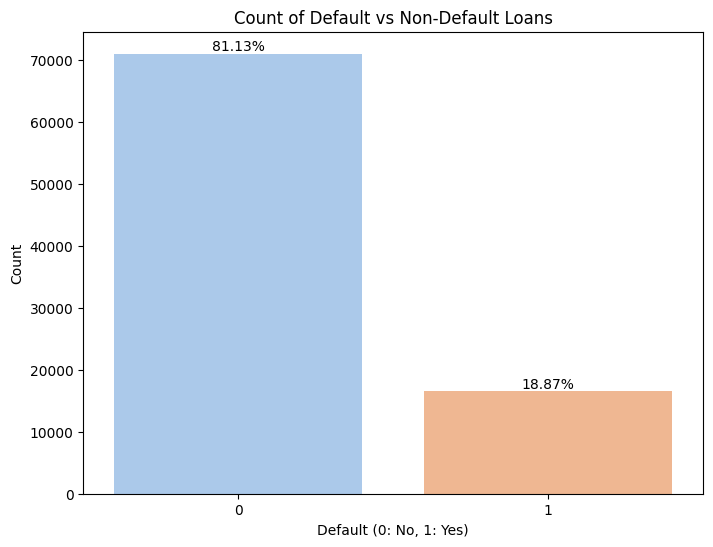

/tmp/ipykernel_4121/1390011909.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Reason', data=df_lf, palette='tab10',


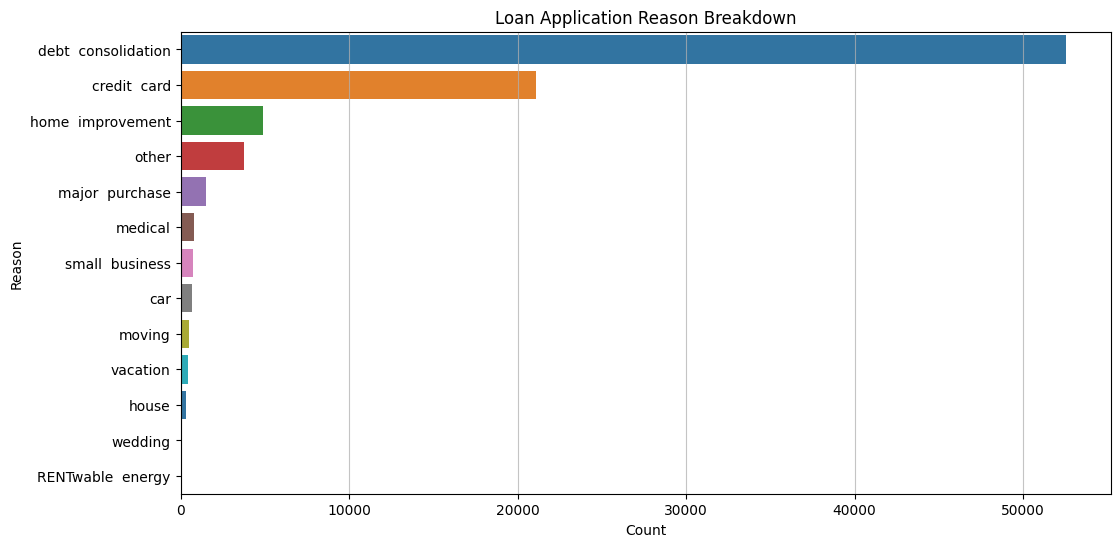

In [55]:
print("\n--- Bar Plots for Categorical Variables ---")

# Bar plot for 'default' (target variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=df_lf, palette='pastel')
plt.title('Count of Default vs Non-Default Loans')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Count')
total = len(df_lf)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 500,
            '{:1.2f}%'.format(100*height/total), ha="center")
plt.show()


# Reason for Loan
plt.figure(figsize=(12, 6))
sns.countplot(y='Reason', data=df_lf, palette='tab10',
              order=df_lf['Reason'].value_counts().index)
plt.title('Loan Application Reason Breakdown')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.grid(axis='x', alpha=0.75)
plt.show()

In [57]:
print("\n--- Descriptive Statistics ---")

# For 'loan_amount'
print("\n'Lend_Amount' Statistics:")
print(f"Mean: {df_lf['Lend_Amount'].mean():,.2f}")
print(f"Median: {df_lf['Lend_Amount'].median():,.2f}")
print(f"Mode: {df_lf['Lend_Amount'].mode()[0]:,.2f}")
print(f"Min: {df_lf['Lend_Amount'].min():,.2f}")
print(f"Max: {df_lf['Lend_Amount'].max():,.2f}")
print(f"75th Percentile: {df_lf['Lend_Amount'].quantile(0.75):,.2f}")

# Grouped by default status
print("\n'loan_amount' Statistics Grouped by 'default':")
print(df_lf.groupby('Default')['Lend_Amount'].agg([
    'mean', 'median', 'min', 'max',
    lambda x: x.mode()[0],
    lambda x: x.quantile(0.75)
]).rename(columns={'<lambda_0>': 'mode', '<lambda_1>': '75th_percentile'}))


# Mode of 'claim_type'
print("\nMost Common Employment Type:")
print(df_lf['Claim_Type'].mode()[0])

# Mode of 'housing_type'
print("\nMost Common Housing Type:")
print(df_lf['Home_Status'].mode()[0])

# Mode of 'loan_purpose'
print("\nMost Common Loan Purpose:")
print(df_lf['Reason'].mode()[0])


--- Descriptive Statistics ---

'Lend_Amount' Statistics:
Mean: 25,920.54
Median: 23,940.00
Mode: 17,100.00
Min: 1,710.00
Max: 59,850.00
75th Percentile: 34,200.00

'loan_amount' Statistics Grouped by 'default':
                 mean   median     min      max     mode  75th_percentile
Default                                                                  
0        26334.630519  24282.0  1710.0  59850.0  17100.0          34200.0
1        24140.268941  20520.0  1710.0  59850.0  17100.0          33174.0

Most Common Employment Type:
I

Most Common Housing Type:
MORTGAGE

Most Common Loan Purpose:
debt  consolidation


# 4. Storytelling With Data graph

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

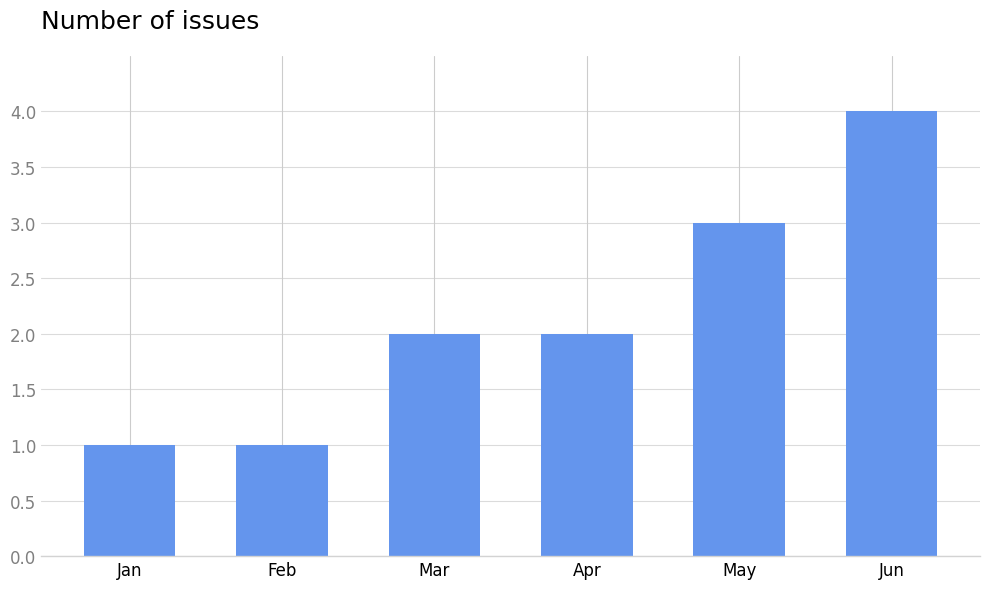

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
issues = np.array([1.0, 1.0, 2.0, 2.0, 3.0, 4.0])
df_issues = pd.DataFrame({'Month': months, 'Issues': issues})

base_color = '#6495ED'
fig, ax = plt.subplots(figsize=(10, 6))

for i, month in enumerate(df_issues['Month']):
    ax.bar(month, df_issues['Issues'][i], color=base_color, width=0.6, zorder=2)

ax.set_title('Number of issues', loc='left', fontsize=18, pad=20, color='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False) 
ax.spines['bottom'].set_color('#D3D3D3')
ax.set_ylim(0, 4.5)
ax.yaxis.grid(True, linestyle='-', alpha=0.7, color='#CCCCCC', zorder=1) 
ax.tick_params(axis='y', length=0) 
ax.tick_params(axis='x', length=0)
ax.set_yticks(np.arange(0, 4.5, 0.5))

plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='gray')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()